<a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jul 22 10:22:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir("./drive/My Drive/")

# Setup

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt  # install dependencies (ignore errors)
%cd yolov5

import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


#Inference

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   279    0   279    0     0   1524      0 --:--:-- --:--:-- --:--:--  1524
100   408    0   408    0     0    628      0 --:--:-- --:--:-- --:--:--   628
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 14.4M    0 14.4M    0     0  9105k      0 --:--:--  0:00:01 --:--:-- 9105k
Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 7.45958e+06 gradients
image 1/2 /content/drive

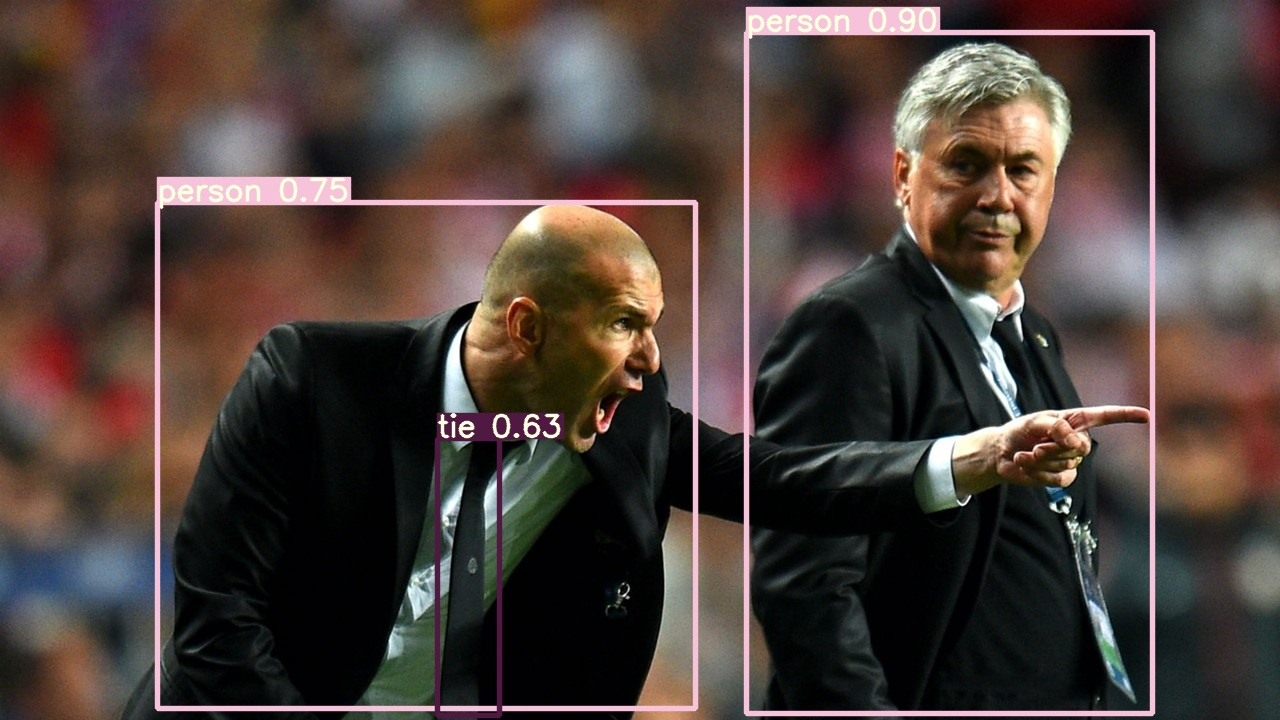

In [5]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

#Train

In [6]:
!git clone https://github.com/NVIDIA/apex
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

Cloning into 'apex'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 7367 (delta 3), reused 0 (delta 0), pack-reused 7353
Receiving objects: 100% (7367/7367), 13.89 MiB | 6.27 MiB/s, done.
Resolving deltas: 100% (4975/4975), done.
Checking out files: 100% (291/291), done.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-nm5mv429
Created temporary directory: /tmp/pip-req-tracker-rz1n9_z1
Created requirements tracker '/tmp/pip-req-tracker-rz1n9_z1'
Created temporary directory: /tmp/pip-install-1unru0o_
Processing ./apex
  Created temporary directory: /tmp/pip-req-build-6dima16r
  Added file:///content/drive/My%20Drive/yolov5/apex to build trac

In [7]:
# Start tensorboard (optional)
%load_ext tensorboard
%tensorboard --logdir runs

Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Train YOLOv5s on coco128 for 3 epochs
#!python train.py --img 416 --batch 16 --epochs 100 --data data.yaml --cfg yolov5s.yaml --weights yolov5s.pt --nosave --cache
!python train.py --img 416 --batch 16 --epochs 500 --data data.yaml --cfg yolov5x.yaml

Using CUDA Apex device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Namespace(batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5x.yaml', data='./data/data.yaml', device='', epochs=500, evolve=False, hyp='', img_size=[416, 416], local_rank=-1, multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='', world_size=1)
Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-07-22 10:33:48.619585: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'optimizer': 'SGD', 'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='1.jpg', update=False, view_img=False, weights=['runs/exp0/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Fusing layers... Model Summary: 284 layers, 8.83973e+07 parameters, 8.45317e+07 gradients
image 1/1 /content/drive/My Drive/yolov5/1.jpg: 416x416 5 masks, Done. (0.033s)
Results saved to /content/drive/My Drive/yolov5/inference/output
Done. (0.082s)


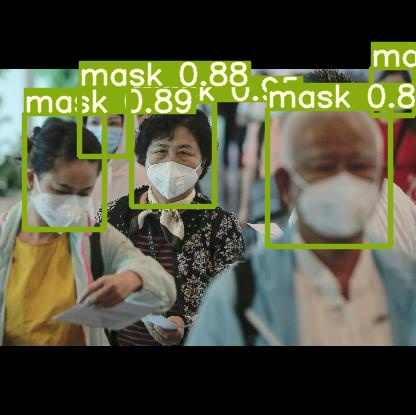

In [11]:
!python detect.py --source 1.jpg --weights runs/exp0/weights/best.pt --img 416
Image(filename='inference/output/1.jpg', width=419)